## Alzheimer's Disease and Mild Cognitive Impairment Prediction through Biomarker Analysis and Machine Learning

### Background

Understanding the distinctive characteristics between individuals diagnosed with Alzheimer's Disease (AD) and those with Mild Cognitive Impairment (MCI) is crucial for advancing our knowledge of neurodegenerative processes and improving diagnostic precision. This analysis delves into the association of various factors, including Age, Mini-Mental State Examination (MMSE) scores, Cerebrospinal Fluid (CSF) biomarkers such as amyloid concentration, total tau protein concentration, phosphorylated tau protein concentration, and the presence of the APOE4 allele. Investigating these features among the two diagnostic groups holds significant implications for several reasons.

**Age:**
Age is a fundamental factor as neurodegenerative disorders often exhibit age-related patterns. Analyzing age differences between AD and MCI groups provides insights into the age-dependent nature of these conditions.

**MMSE Scores:**
The MMSE is a widely-used cognitive screening tool. Exploring MMSE scores in AD and MCI individuals offers a comprehensive understanding of cognitive decline and aids in distinguishing the severity of impairment between the two diagnostic groups.

**CSF Biomarkers (Amyloid, Total Tau, Phosphorylated Tau):**
Cerebrospinal Fluid biomarkers are pivotal in understanding the neurochemical changes associated with AD and MCI. Amyloid concentration reflects the accumulation of plaques, while total and phosphorylated tau proteins are indicative of neurofibrillary tangle formation. Investigating these biomarkers contributes to the identification of distinctive biochemical signatures characterizing AD and MCI.

**APOE4 Allele:**
The APOE4 allele has been consistently associated with an increased risk of AD. Analyzing its presence in the context of AD and MCI allows for the exploration of its potential role as a genetic marker in distinguishing between the two diagnostic categories.

Overall, this analysis aims to uncover valuable insights into the multifaceted nature of Alzheimer's Disease and Mild Cognitive Impairment, shedding light on the interplay between demographic, cognitive, and genetic factors. Such knowledge has the potential to refine diagnostic criteria, inform treatment strategies, and ultimately contribute to the advancement of therapeutic interventions for neurodegenerative disorders.

### Import Essential Libraries

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Loading an Data Understanding

In [2]:
# load the dataset
data = pd.read_csv('../data/alzheimer.csv', index_col=[0])

# check the dimension of the dataset
print('Dimension of the dataset: ', data.shape)

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

# view the first 5 rows of the dataset
data.head()

Dimension of the dataset:  (212, 10)
Attributes in the dataset:  ['Diagnostic' 'Sex' 'Age' 'MMSE' 'CSF Amyloid (pg/mL)'
 'CSF Total tau (pg/mL)' 'CSF Phosphorylated tau (pg/mL)' 'APOE4'
 "Progression to Alzheimer's Disease" 'Progression time (months)']


,Diagnostic,Sex,Age,MMSE,CSF Amyloid (pg/mL),CSF Total tau (pg/mL),CSF Phosphorylated tau (pg/mL),APOE4,Progression to Alzheimer's Disease,Progression time (months)
Sample,,,,,,,,,,
1,Alzheimer's Disease,Female,68,26,688.0,369.0,107.0,Yes,NaN,NaN
2,Alzheimer's Disease,Female,66,22,489.0,482.0,176.0,Yes,NaN,NaN
3,Alzheimer's Disease,Female,72,23,509.0,329.0,114.0,Yes,NaN,NaN
4,Alzheimer's Disease,Male,73,25,544.0,482.0,80.0,No,NaN,NaN
5,Alzheimer's Disease,Female,75,15,303.0,806.0,120.0,No,NaN,NaN


### Attributes Description

1. Diagnostic - labels, 3 categories: Alzheimer's Disease, Mild Cognitive Impairment, Control
2. Sex - gender of the subject, 2 categories: Female, Male
3. Age - age of the subject (in years)
4. MMSE - Mini-Mental State Examination (MMSE) is a widely used cognitive screening test that assesses various cognitive functions, including memory, attention, language, and visuospatial skills.
5. CSF Amyloid (pg/mL) - Cerebrospinal fluid (CSF) amyloid concentration
6. CSF Total tau (pg/mL) - Cerebrospinal fluid (CSF) Total Tau (t-tau) concentration
7. CSF Phosphorylated tau (pg/mL) - Cerebrospinal fluid (CSF) phosphorylated tau (p-tau) concentration
8. APOE4 - APOE ε4 allele (ApoE4), 2 categories: Yes, No
9. Progression to Alzheimer's Disease - 
10. Progression time (months) - 

In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 1 to 212
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Diagnostic                          212 non-null    object 
 1   Sex                                 212 non-null    object 
 2   Age                                 212 non-null    int64  
 3   MMSE                                212 non-null    int64  
 4   CSF Amyloid (pg/mL)                 198 non-null    float64
 5   CSF Total tau (pg/mL)               198 non-null    float64
 6   CSF Phosphorylated tau (pg/mL)      198 non-null    float64
 7   APOE4                               209 non-null    object 
 8   Progression to Alzheimer's Disease  89 non-null     object 
 9   Progression time (months)           47 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 18.2+ KB


In [4]:
# drop columns 'Progression to Alzheimer's Disease' & 'Progression time (months)'
data.drop(columns=["Progression to Alzheimer's Disease",'Progression time (months)'], axis=1, inplace=True)

In [5]:
# exclude missing value from the statistical analysis
data.dropna(axis=0, inplace=True)

### Exploratory Data Analysis

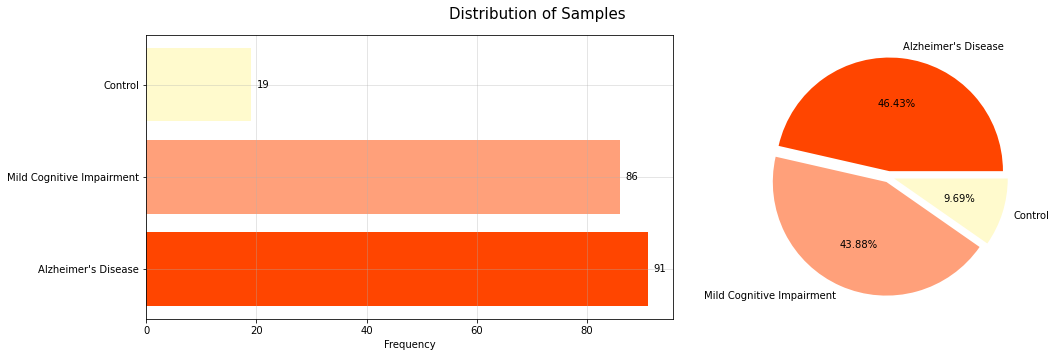

In [6]:
# distribution of the samples in the dataset
targets = data['Diagnostic'].value_counts()
colors = ['orangered','lightsalmon','lemonchiffon']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=targets.index, width=targets.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)

for index, values in enumerate(targets):
    axes[0].text(values+1, index, str(values), va='center')
    
axes[1].pie(targets.values, labels=targets.index, autopct='%.2f%%', explode=([0.05]*len(targets.index)), colors=colors)
figure.suptitle('Distribution of Samples', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

In [7]:
# exclude the control group from the analysis
fil_data = data[data['Diagnostic']!='Control']

#### Distribution of Age in Alzheimer's Disease Patients and Mild Cognitive Impairment (MCI) Patients by Gender

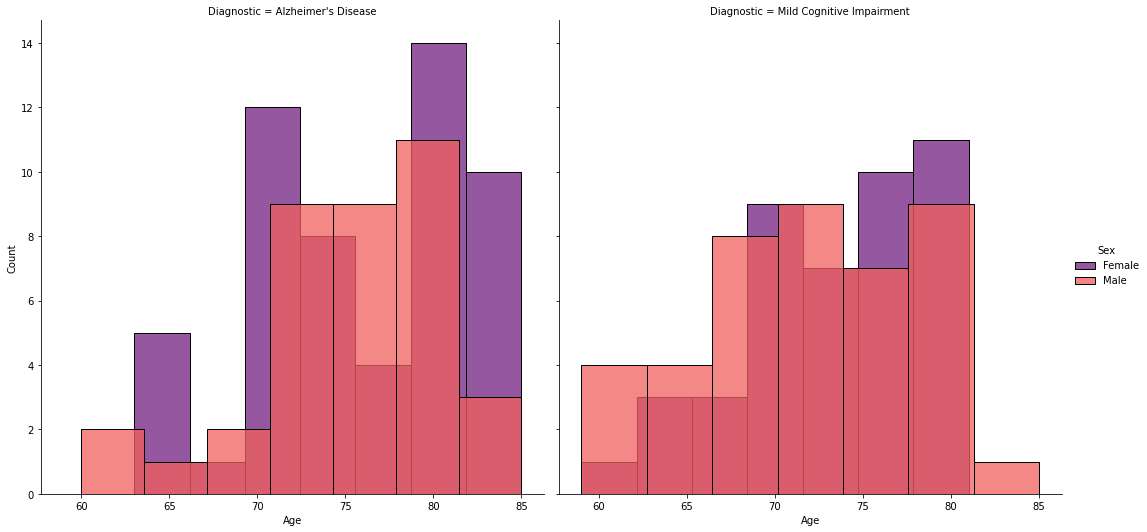

In [8]:
g = sns.FacetGrid(fil_data, col='Diagnostic', hue='Sex', palette='magma', height=7.5, aspect=1)
g.map(sns.histplot, 'Age')
g.add_legend()

#### Distribution of MMSE Scores in Alzheimer's Disease Patients and Mild Cognitive Impairment (MCI) Patients by Gender

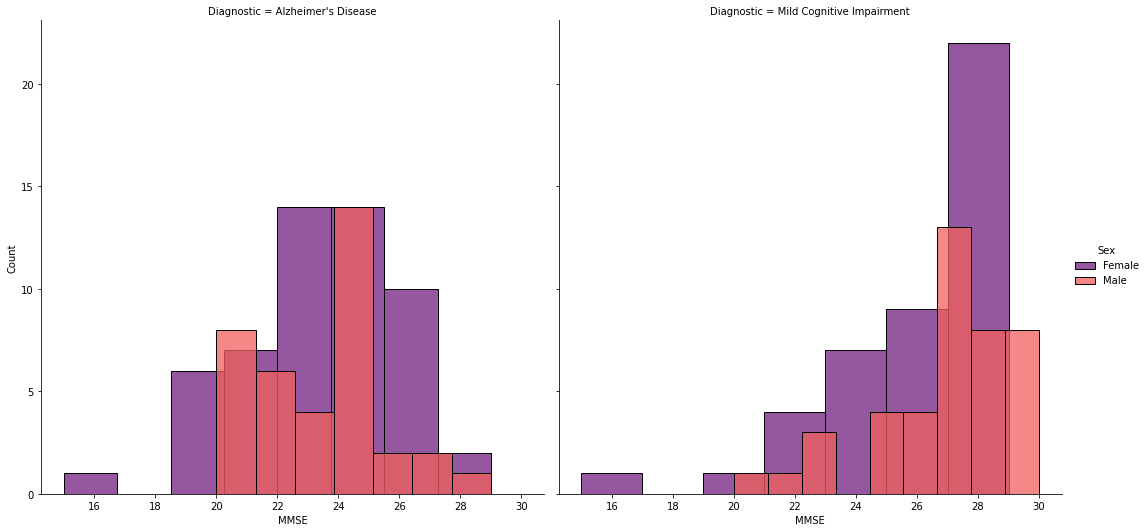

In [9]:
g = sns.FacetGrid(fil_data, col='Diagnostic', hue='Sex', palette='magma', height=7.5, aspect=1)
g.map(sns.histplot, 'MMSE')
g.add_legend()

#### Distribution of CSF Amyloid Concentration (pg/mL) in Alzheimer's Disease Patients and Mild Cognitive Impairment (MCI) Patients by Gender

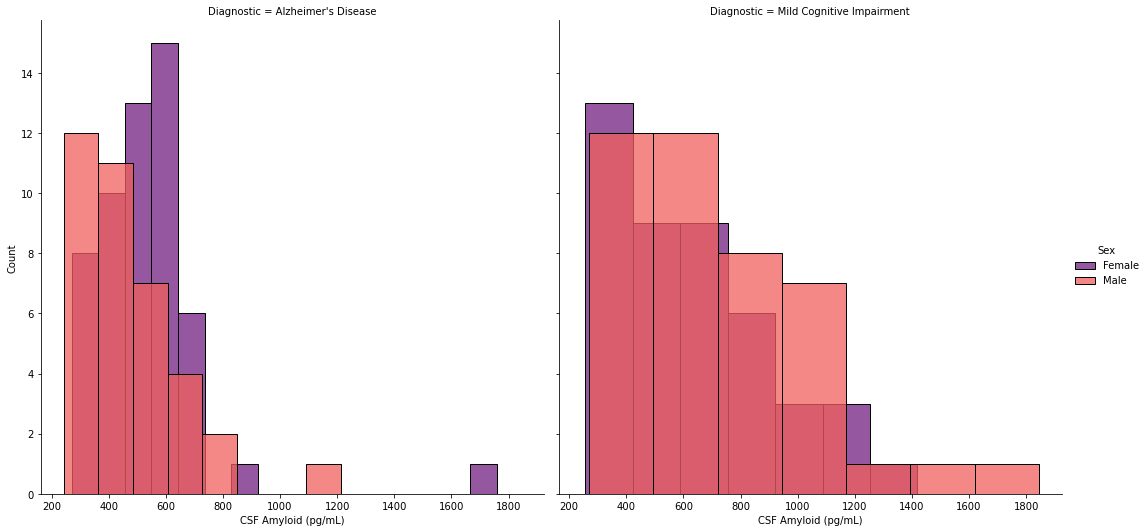

In [10]:
g = sns.FacetGrid(fil_data, col='Diagnostic', hue='Sex', palette='magma', height=7.5, aspect=1)
g.map(sns.histplot, 'CSF Amyloid (pg/mL)')
g.add_legend()

#### Distribution of CSF Total Tau Protein Concentration (pg/mL) in Alzheimer's Disease Patients and Mild Cognitive Impairment (MCI) Patients by Gender

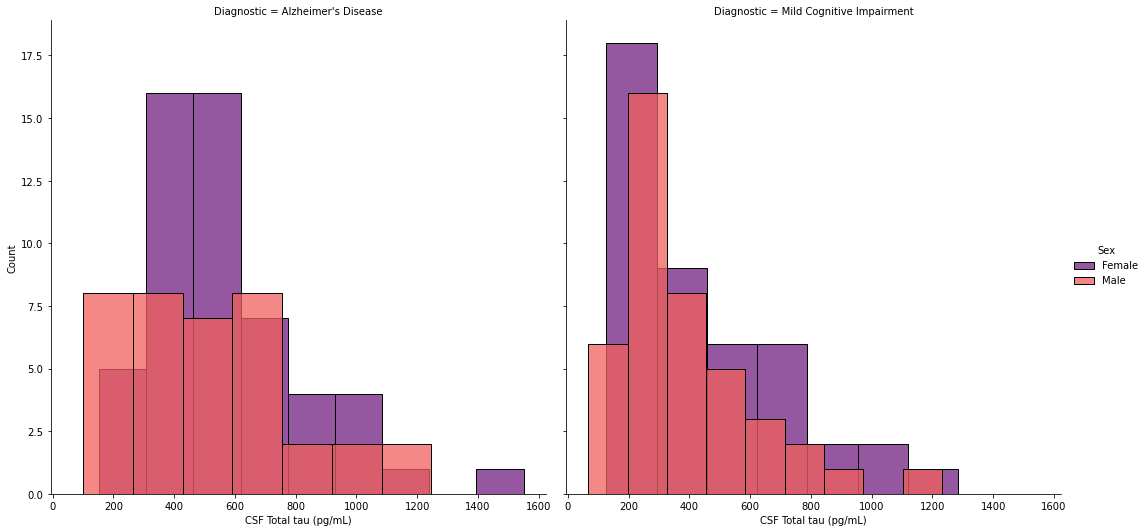

In [11]:
g = sns.FacetGrid(fil_data, col='Diagnostic', hue='Sex', palette='magma', height=7.5, aspect=1)
g.map(sns.histplot, 'CSF Total tau (pg/mL)')
g.add_legend()

#### Distribution of CSF Phosphorylated Tau Protein Concentration (pg/mL) in Alzheimer's Disease Patients and Mild Cognitive Impairment (MCI) Patients by Gender

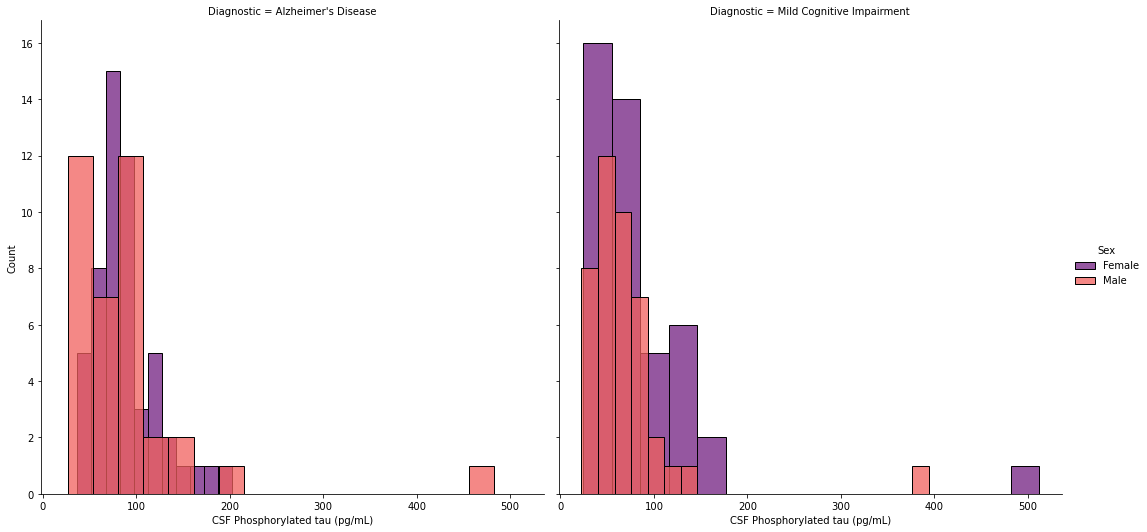

In [12]:
g = sns.FacetGrid(fil_data, col='Diagnostic', hue='Sex', palette='magma', height=7.5, aspect=1)
g.map(sns.histplot, 'CSF Phosphorylated tau (pg/mL)')
g.add_legend()

### Statistical Analysis

In [13]:
from scipy.stats import levene

# define a helper function to perform Levene test
def levenetest(group1, group2):
    res = levene(group1, group2)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    
    print('Levene Test for Equal Variance:')
    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)
    
    alpha = 0.05
    if pvalue < alpha:
        print('Reject null hypothesis. The groups have different variance.')
    else:
        print('Failed to reject null hypothesis. The groups have equal variance.')
    print('\n')

In [14]:
from scipy.stats import shapiro

# define a helper function to perform Shapiro-Wilk test for normality
def shapirotest(group, groupName):
    res = shapiro(group)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    
    print(f'Shapiro Test for Normality ({groupName}):')
    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)
    
    alpha = 0.05
    if pvalue < alpha:
        print('Reject null hypothesis. The sample does not come from a normal distribution.')
    else:
        print('Failed to reject null hypothesis. The sample comes from a normal distribution.')
    print('\n')

In [15]:
from scipy.stats import ttest_ind

# define a helper function to perform indepedent T-test
def ttest(group1, group2):
    res = ttest_ind(group1, group2)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    print('Independent T-test: ')
    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)

In [16]:
from scipy.stats import mannwhitneyu

# define a helper function to perform Mann-Whitney U test
def mwutest(group1, group2):
    res = mannwhitneyu(group1, group2)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    print('Mann-Whitney U test: ')
    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)

In [17]:
# define a helper function to compute Cohen's d value
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    
    return mean_diff / pooled_std

### Variable 1: Age
#### Question | Is there a significant difference in the mean age between individuals diagnosed with Alzheimer's disease and those with mild cognitive impairment?

- Null Hypothesis (H0): There is no significant difference in the mean age between individuals diagnosed with Alzheimer's disease and those with mild cognitive impairment.
- Alternative Hypothesis (H1): There is a significant difference in the mean age between individuals diagnosed with Alzheimer's disease and those with mild cognitive impairment.

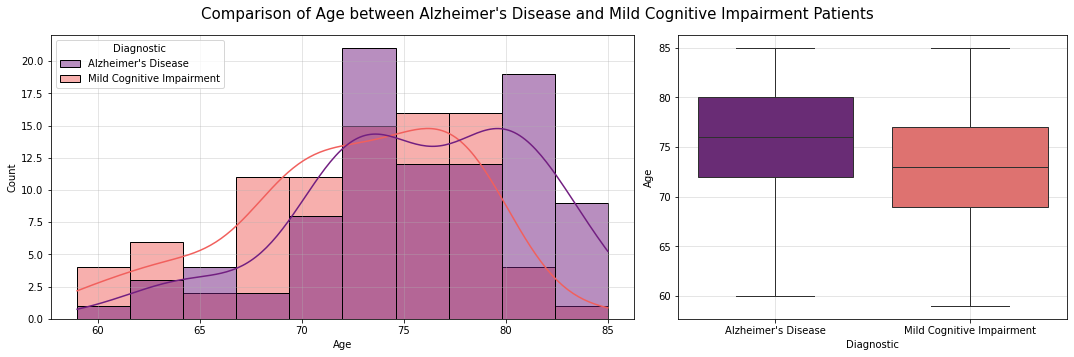

,count,mean,std,min,25%,50%,75%,max
Diagnostic,,,,,,,,
Alzheimer's Disease,91.0,75.659341,5.619845,60.0,72.0,76.0,80.0,85.0
Mild Cognitive Impairment,86.0,72.581395,5.603497,59.0,69.0,73.0,77.0,85.0


Levene Test for Equal Variance:
Test statistic:  0.0359
Test p-value:  0.85
Failed to reject null hypothesis. The groups have equal variance.


Shapiro Test for Normality (Alzheimer's Disease):
Test statistic:  0.9613
Test p-value:  0.0084
Reject null hypothesis. The sample does not come from a normal distribution.


Shapiro Test for Normality (Mild Cognitive Impairment):
Test statistic:  0.9619
Test p-value:  0.0124
Reject null hypothesis. The sample does not come from a normal distribution.


Independent T-test: 
Test statistic:  3.647
Test p-value:  0.0003
Cohen's d:  0.5485


In [19]:
# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=fil_data, x=fil_data['Age'], hue=fil_data['Diagnostic'], kde=True, ax=axes[0], palette='magma')
axes[0].grid(alpha=0.4)
sns.boxplot(data=fil_data, x=fil_data['Diagnostic'], y=fil_data['Age'], hue=fil_data['Diagnostic'], ax=axes[1], palette='magma')
axes[1].grid(alpha=0.4)
figure.suptitle('Comparison of Age between Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display summary statistic
groups = fil_data.groupby('Diagnostic')
alzheimer = groups.get_group('Alzheimer\'s Disease')
mci = groups.get_group('Mild Cognitive Impairment')
display(groups['Age'].describe())

# Levene test for equal variance
levenetest(alzheimer['Age'], mci['Age'])

# Shapiro-Wilk test for normality
# Normality for Alzheimer's disease group
shapirotest(alzheimer['Age'], 'Alzheimer\'s Disease')

# Normality for mild cognitive impairment group
shapirotest(mci['Age'], 'Mild Cognitive Impairment')

# perform independent T-test
ttest(alzheimer['Age'], mci['Age'])
                             
# compute the effect size Cohen's d value
cohenD = cohen_d(alzheimer['Age'], mci['Age'])
print('Cohen\'s d: ' , round(cohenD,4))

##### Interpretation of Statistical Test Result:

The analysis revealed a significant difference in mean ages between individuals with Alzheimer's Disease and Mild Cognitive Impairment. Despite the violation of normality assumptions in both groups, the robustness of the t-test allowed for reliable inference. The groups demonstrated equal variances, providing confidence in the validity of the t-test results. In summary, the analysis provides evidence that age is significantly associated with the diagnosis, with individuals diagnosed with Alzheimer's Disease tending to be older on average. The effect size suggests a moderate impact, reinforcing the practical significance of the observed age difference. However, it's important to note that while age differences are statistically significant, they do not imply causation, and the influence of other factors should be considered in a comprehensive understanding of cognitive disorders.

### Variable 2: Mini-Mental State Examination (MMSE) scores 
#### Question | Is there a significant difference in the mean MMSE scores between individuals diagnosed with Alzheimer's disease and those with mild cognitive impairment?

- Null Hypothesis (H0): There is no significant difference in the mean MMSE scores between individuals diagnosed with Alzheimer's disease and those with mild cognitive impairment.
- Alternative Hypothesis (H1): There is a significant difference in the mean MMSE scores between individuals diagnosed with Alzheimer's disease and those with mild cognitive impairment.

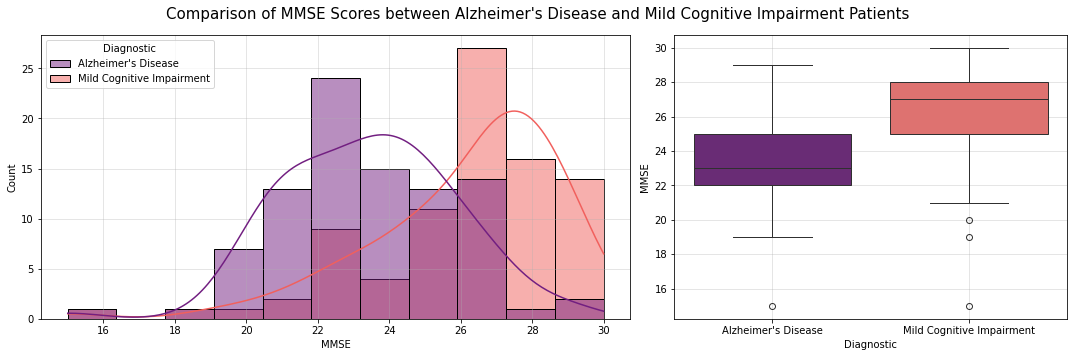

,count,mean,std,min,25%,50%,75%,max
Diagnostic,,,,,,,,
Alzheimer's Disease,91.0,23.395604,2.412371,15.0,22.0,23.0,25.0,29.0
Mild Cognitive Impairment,86.0,26.151163,2.659135,15.0,25.0,27.0,28.0,30.0


Levene Test for Equal Variance:
Test statistic:  0.021
Test p-value:  0.8849
Failed to reject null hypothesis. The groups have equal variance.


Shapiro Test for Normality (Alzheimer's Disease):
Test statistic:  0.9705
Test p-value:  0.0364
Reject null hypothesis. The sample does not come from a normal distribution.


Shapiro Test for Normality (Mild Cognitive Impairment):
Test statistic:  0.8762
Test p-value:  0.0
Reject null hypothesis. The sample does not come from a normal distribution.


Independent T-test: 
Test statistic:  -7.2273
Test p-value:  0.0
Cohen's d:  -1.0854


In [20]:
# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=fil_data, x=fil_data['MMSE'], hue=fil_data['Diagnostic'], kde=True, ax=axes[0], palette='magma')
axes[0].grid(alpha=0.4)
sns.boxplot(data=fil_data, x=fil_data['Diagnostic'], y=fil_data['MMSE'], hue=fil_data['Diagnostic'], ax=axes[1], palette='magma')
axes[1].grid(alpha=0.4)
figure.suptitle('Comparison of MMSE Scores between Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display summary statistic
display(groups['MMSE'].describe())

# Levene test for equal variance
levenetest(alzheimer['MMSE'], mci['MMSE'])

# Shapiro-Wilk test for normality
# Normality for Alzheimer's disease group
shapirotest(alzheimer['MMSE'], 'Alzheimer\'s Disease')

# Normality for mild cognitive impairment group
shapirotest(mci['MMSE'], 'Mild Cognitive Impairment')

# perform independent T-test
ttest(alzheimer['MMSE'], mci['MMSE'])
                             
# compute the effect size Cohen's d value
cohenD = cohen_d(alzheimer['MMSE'], mci['MMSE'])
print('Cohen\'s d: ' , round(cohenD, 4))

##### Interpretation of Statistical Test Result:

The Mini-Mental State Examination (MMSE) scores exhibit notable distinctions between the Alzheimer's Disease and Mild Cognitive Impairment (MCI) groups. Specifically, the mean MMSE score for the Alzheimer's Disease group is 23.40 ± 2.41, while the MCI group demonstrates a higher mean of 26.15 ± 2.70. The results of the independent t-test provide robust evidence that MMSE scores significantly differ (p < 0.05) between these two diagnostic cohorts. The Levene test affirms the equality of variances between the groups, bolstering the validity of the t-test results and ensuring the reliability of the observed differences. Furthermore, the substantial effect size (Cohen's d) of -1.0854 underscores the magnitude of the difference in MMSE scores. Notably, individuals with Alzheimer's Disease exhibit lower scores on average compared to those with Mild Cognitive Impairment. This finding is supported by the large effect size, emphasizing the clinical significance of the observed distinctions. In summary, the analysis yields compelling evidence of a meaningful difference in MMSE scores between individuals with Alzheimer's Disease and Mild Cognitive Impairment. The considerable effect size suggests that MMSE scores could serve as a valuable indicator for effectively distinguishing between these two diagnostic groups in clinical and research settings.

### Variable 3: Cerebrospinal Fluid (CSF) Amyloid Concentration (pg/mL)
#### Question | Is there a significant difference in the mean cerebrospinal fluid (CSF) amyloid concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment?

- Null Hypothesis (H0): There is no significant difference in the mean CSF amyloid concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment.
- Alternative Hypothesis (H1): There is a significant difference in the mean CSF amyloid concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment.

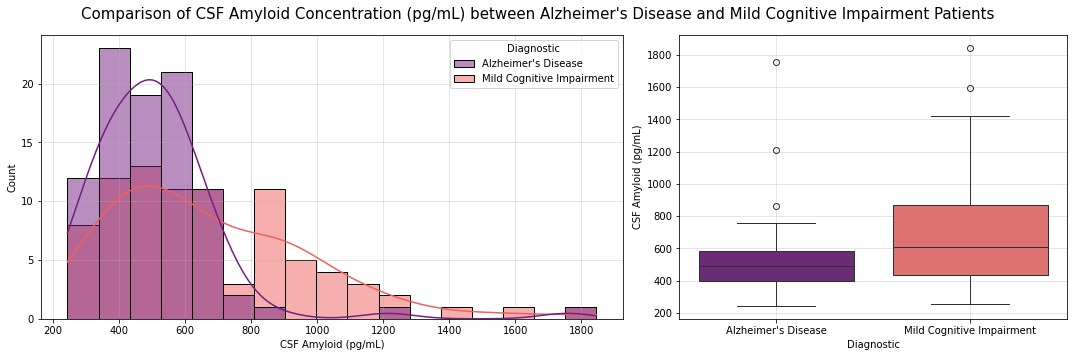

,count,mean,std,min,25%,50%,75%,max
Diagnostic,,,,,,,,
Alzheimer's Disease,91.0,508.384615,201.700425,243.0,396.5,493.0,580.50,1758.0
Mild Cognitive Impairment,86.0,676.883721,309.804812,257.0,436.5,611.5,870.25,1845.0


Levene Test for Equal Variance:
Test statistic:  16.0708
Test p-value:  0.0001
Reject null hypothesis. The groups have different variance.


Shapiro Test for Normality (Alzheimer's Disease):
Test statistic:  0.7615
Test p-value:  0.0
Reject null hypothesis. The sample does not come from a normal distribution.


Shapiro Test for Normality (Mild Cognitive Impairment):
Test statistic:  0.9137
Test p-value:  0.0
Reject null hypothesis. The sample does not come from a normal distribution.


Mann-Whitney U test: 
Test statistic:  2603.5
Test p-value:  0.0001
Cohen's d:  -0.6446


In [21]:
# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=fil_data, x=fil_data['CSF Amyloid (pg/mL)'], hue=fil_data['Diagnostic'], kde=True, ax=axes[0], palette='magma')
axes[0].grid(alpha=0.4)
sns.boxplot(data=fil_data, x=fil_data['Diagnostic'], y=fil_data['CSF Amyloid (pg/mL)'], hue=fil_data['Diagnostic'], ax=axes[1], palette='magma')
axes[1].grid(alpha=0.4)
figure.suptitle('Comparison of CSF Amyloid Concentration (pg/mL) between Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display summary statistic
display(groups['CSF Amyloid (pg/mL)'].describe())

# Levene test for equal variance
levenetest(alzheimer['CSF Amyloid (pg/mL)'], mci['CSF Amyloid (pg/mL)'])

# Shapiro-Wilk test for normality
# Normality for Alzheimer's disease group
shapirotest(alzheimer['CSF Amyloid (pg/mL)'], 'Alzheimer\'s Disease')

# Normality for mild cognitive impairment group
shapirotest(mci['CSF Amyloid (pg/mL)'], 'Mild Cognitive Impairment')

# perform Mann-Whitney U test (violation of both assumption of equal variance and normality in independent T-test)
mwutest(alzheimer['CSF Amyloid (pg/mL)'], mci['CSF Amyloid (pg/mL)'])
                             
# compute the effect size Cohen's d value
cohenD = cohen_d(alzheimer['CSF Amyloid (pg/mL)'], mci['CSF Amyloid (pg/mL)'])
print('Cohen\'s d: ' , round(cohenD, 4))

##### Interpretation of Statistical Test Result:

The examination of Cerebrospinal Fluid (CSF) amyloid concentrations in individuals with Alzheimer's Disease and Mild Cognitive Impairment (MCI) reveals meaningful distinctions. Specifically, the mean CSF amyloid concentration in the Alzheimer's Disease group is 508.38 ± 201.80, while the MCI group exhibits a higher mean of 676.88 ± 309.80. The observed significant difference in variances, as indicated by the Levene test, emphasizes the heterogeneity in the distribution of CSF Amyloid concentrations between these two diagnostic groups. Additionally, the rejection of normality assumptions in both groups, as revealed by the Shapiro-Wilk tests, underscores the non-normal distribution of CSF Amyloid concentrations. To address the violations of equal variance and normality assumptions for the independent t-test, a Mann-Whitney U test, a non-parametric alternative, was employed. The Mann-Whitney U test confirms a substantial and statistically significant difference (p < 0.05) in the distributions of CSF Amyloid concentrations between individuals with Alzheimer's Disease and those with Mild Cognitive Impairment. The negative Cohen's d further supports the observed distinction, indicating that individuals with Alzheimer's Disease tend to exhibit lower CSF Amyloid concentrations on average compared to those with Mild Cognitive Impairment. In summary, the utilization of the Mann-Whitney U test provides robust evidence for a significant difference in CSF Amyloid concentrations between individuals with Alzheimer's Disease and Mild Cognitive Impairment. These findings align with existing literature that highlights CSF amyloids as valuable biomarkers for distinguishing between Alzheimer's Disease and Mild Cognitive Impairment.

### Variable 4: Cerebrospinal Fluid (CSF) Total Tau Protein Concentration (pg/mL)
#### Question | Is there a significant difference in the mean cerebrospinal fluid (CSF) total tau concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment?

- Null Hypothesis (H0): There is no significant difference in the mean CSF total tau concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment.
- Alternative Hypothesis (H1): There is a significant difference in the mean CSF total tau concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment.

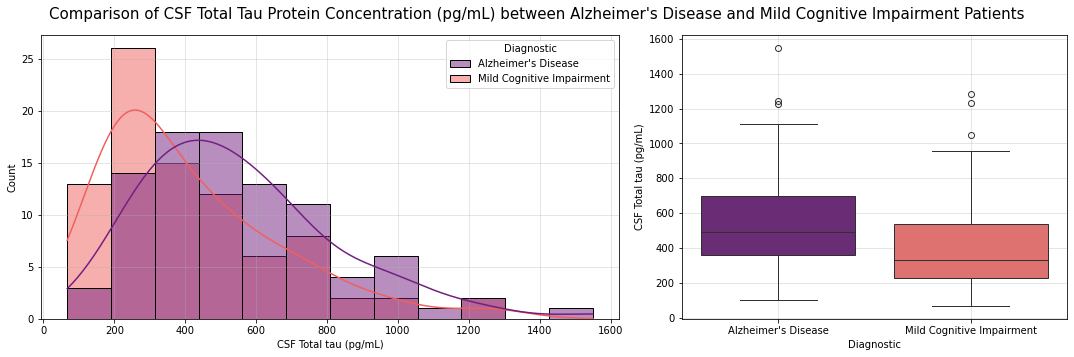

,count,mean,std,min,25%,50%,75%,max
Diagnostic,,,,,,,,
Alzheimer's Disease,91.0,551.087912,272.715914,101.0,358.5,494.0,695.50,1550.0
Mild Cognitive Impairment,86.0,416.198837,255.880528,67.1,229.5,333.0,539.25,1284.0


Levene Test for Equal Variance:
Test statistic:  0.293
Test p-value:  0.589
Failed to reject null hypothesis. The groups have equal variance.


Shapiro Test for Normality (Alzheimer's Disease):
Test statistic:  0.9399
Test p-value:  0.0004
Reject null hypothesis. The sample does not come from a normal distribution.


Shapiro Test for Normality (Mild Cognitive Impairment):
Test statistic:  0.8819
Test p-value:  0.0
Reject null hypothesis. The sample does not come from a normal distribution.


Independent T-test: 
Test statistic:  3.3888
Test p-value:  0.0009
Cohen's d:  0.5101


In [22]:
# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=fil_data, x=fil_data['CSF Total tau (pg/mL)'], hue=fil_data['Diagnostic'], kde=True, ax=axes[0], palette='magma')
axes[0].grid(alpha=0.4)
sns.boxplot(data=fil_data, x=fil_data['Diagnostic'], y=fil_data['CSF Total tau (pg/mL)'], hue=fil_data['Diagnostic'], ax=axes[1], palette='magma')
axes[1].grid(alpha=0.4)
figure.suptitle('Comparison of CSF Total Tau Protein Concentration (pg/mL) between Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display summary statistic
display(groups['CSF Total tau (pg/mL)'].describe())

# Levene test for equal variance
levenetest(alzheimer['CSF Total tau (pg/mL)'], mci['CSF Total tau (pg/mL)'])

# Shapiro-Wilk test for normality
# Normality for Alzheimer's disease group
shapirotest(alzheimer['CSF Total tau (pg/mL)'], 'Alzheimer\'s Disease')

# Normality for mild cognitive impairment group
shapirotest(mci['CSF Total tau (pg/mL)'], 'Mild Cognitive Impairment')

# perform independent T-test
ttest(alzheimer['CSF Total tau (pg/mL)'], mci['CSF Total tau (pg/mL)'])
                             
# compute the effect size Cohen's d value
cohenD = cohen_d(alzheimer['CSF Total tau (pg/mL)'], mci['CSF Total tau (pg/mL)'])
print('Cohen\'s d: ' , round(cohenD, 4))

##### Interpretation of Statistical Test Result:

The investigation into Cerebrospinal Fluid (CSF) total tau concentrations in individuals with Alzheimer's Disease and Mild Cognitive Impairment (MCI) uncovers noteworthy distinctions. Specifically, the mean CSF total tau concentration in the Alzheimer's Disease group is 551.09 ± 272.72, while the MCI group demonstrates a comparatively lower mean of 416.20 ± 255.88. The Levene test for equal variance, with a test statistic of 0.293 and a p-value of 0.589, indicates no significant difference in variances between the two diagnostic groups. This suggests that the assumption of equal variance for the subsequent independent t-test is upheld. However, the Shapiro-Wilk tests for normality reveal departures from normal distribution assumptions in both groups. For the Alzheimer's Disease group, the test statistic is 0.9399 with a p-value of 0.0004, and for the MCI group, the test statistic is 0.8819 with a p-value of 0.0. Both groups reject the null hypothesis of normality. Despite the normality violations, an independent t-test is conducted due to the robustness of the test with larger sample sizes. The t-test yields a test statistic of 3.3888 with a p-value of 0.0009, indicating a statistically significant difference (p < 0.05) in mean CSF total tau concentrations between the two diagnostic groups. The calculated Cohen's d effect size is 0.5101, suggesting a moderate effect size. In summary, while normality assumptions are violated, the analysis utilizing an independent t-test provides compelling evidence of a significant difference in CSF total tau concentrations between individuals with Alzheimer's Disease and Mild Cognitive Impairment. The moderate effect size enhances the practical significance of the observed distinction.

### Variable 5: Cerebrospinal Fluid (CSF) Phoshorylated Tau Protein Concentration (pg/mL)
#### Question | Is there a significant difference in the mean cerebrospinal fluid (CSF) phosphorylated tau concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment?

- Null Hypothesis (H0): There is no significant difference in the mean CSF phosphorylated tau concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment.
- Alternative Hypothesis (H1): There is a significant difference in the mean CSF phosphorylated tau concentration between individuals diagnosed with Alzheimer's Disease and those with Mild Cognitive Impairment.

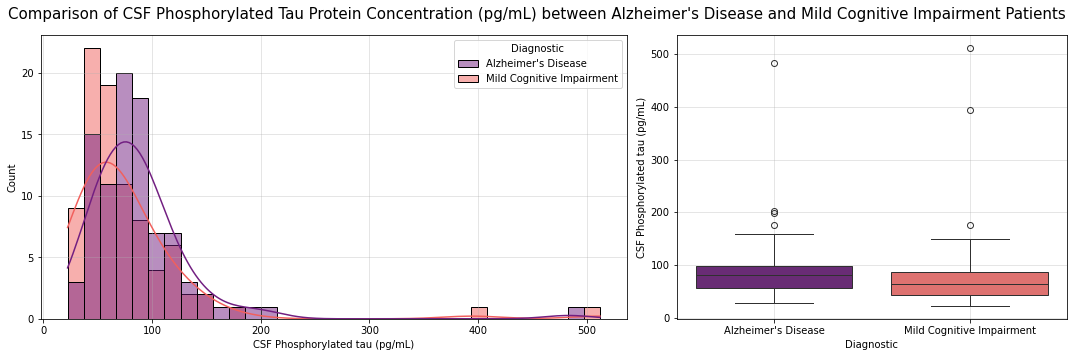

,count,mean,std,min,25%,50%,75%,max
Diagnostic,,,,,,,,
Alzheimer's Disease,91.0,87.792308,54.143499,27.1,55.400,81.0,97.50,483.0
Mild Cognitive Impairment,86.0,77.497674,66.700941,22.4,43.875,63.7,86.65,512.0


Levene Test for Equal Variance:
Test statistic:  0.1134
Test p-value:  0.7367
Failed to reject null hypothesis. The groups have equal variance.


Shapiro Test for Normality (Alzheimer's Disease):
Test statistic:  0.6355
Test p-value:  0.0
Reject null hypothesis. The sample does not come from a normal distribution.


Shapiro Test for Normality (Mild Cognitive Impairment):
Test statistic:  0.5399
Test p-value:  0.0
Reject null hypothesis. The sample does not come from a normal distribution.


Independent T-test: 
Test statistic:  -11.9649
Test p-value:  0.0
Cohen's d:  0.1695


In [23]:
# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=fil_data, x=fil_data['CSF Phosphorylated tau (pg/mL)'], hue=fil_data['Diagnostic'], kde=True, ax=axes[0], palette='magma')
axes[0].grid(alpha=0.4)
sns.boxplot(data=fil_data, x=fil_data['Diagnostic'], y=fil_data['CSF Phosphorylated tau (pg/mL)'], hue=fil_data['Diagnostic'], ax=axes[1], palette='magma')
axes[1].grid(alpha=0.4)
figure.suptitle('Comparison of CSF Phosphorylated Tau Protein Concentration (pg/mL) between Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display summary statistic
display(groups['CSF Phosphorylated tau (pg/mL)'].describe())

# Levene test for equal variance
levenetest(alzheimer['CSF Phosphorylated tau (pg/mL)'], mci['CSF Phosphorylated tau (pg/mL)'])

# Shapiro-Wilk test for normality
# Normality for Alzheimer's disease group
shapirotest(alzheimer['CSF Phosphorylated tau (pg/mL)'], 'Alzheimer\'s Disease')

# Normality for mild cognitive impairment group
shapirotest(mci['CSF Phosphorylated tau (pg/mL)'], 'Mild Cognitive Impairment')

# perform independent T-test
ttest(alzheimer['CSF Phosphorylated tau (pg/mL)'], mci['CSF Total tau (pg/mL)'])
                             
# compute the effect size Cohen's d value
cohenD = cohen_d(alzheimer['CSF Phosphorylated tau (pg/mL)'], mci['CSF Phosphorylated tau (pg/mL)'])
print('Cohen\'s d: ' , round(cohenD, 4))

##### Interpretation of Statistical Test Result:

The exploration of Cerebrospinal Fluid (CSF) phosphorylated tau protein concentrations in individuals with Alzheimer's Disease and Mild Cognitive Impairment (MCI) unveils distinctive patterns. Specifically, the mean CSF phosphorylated tau concentration in the Alzheimer's Disease group is 87.79 ± 54.14, whereas the MCI group presents a slightly lower mean of 77.50 ± 66.70. The Levene test for equal variance, with a test statistic of 0.1134 and a p-value of 0.7367, indicates no substantial difference in variances between the two diagnostic groups. This implies that the assumption of equal variance for the subsequent independent t-test holds. However, both Shapiro-Wilk tests for normality demonstrate significant departures from normal distribution assumptions. For the Alzheimer's Disease group, the test statistic is 0.6355 with a p-value of 0.0, and for the MCI group, the test statistic is 0.5399 with a p-value of 0.0. In both cases, the null hypothesis of normality is rejected. Despite the deviations from normality, an independent t-test is conducted due to the robustness of the test with larger sample sizes. The t-test yields a substantial test statistic of -11.9649 with a p-value of 0.0, signifying a highly significant difference (p < 0.05) in mean CSF phosphorylated tau concentrations between the two diagnostic groups. The Cohen's d effect size is calculated as 0.1695, indicating a small effect size. In conclusion, although normality assumptions are not met, the independent t-test provides compelling evidence of a significant difference in CSF phosphorylated tau concentrations between individuals with Alzheimer's Disease and Mild Cognitive Impairment. The small effect size suggests a subtle distinction in the phosphorylated tau protein profiles across the two diagnostic groups.

### Variable 6: APOE ε4 allele (ApoE4)
#### Question | Is there a significant association between the presence of the APOE ε4 allele (ApoE4) and the diagnostic groups of Alzheimer's Disease and Mild Cognitive Impairment?

- Null Hypothesis (H0): There is no significant association between the presence of the APOE ε4 allele (ApoE4) and the diagnostic groups of Alzheimer's Disease and Mild Cognitive Impairment.
- Alternative Hypothesis (H1): There is a significant association between the presence of the APOE ε4 allele (ApoE4) and the diagnostic groups of Alzheimer's Disease and Mild Cognitive Impairment.

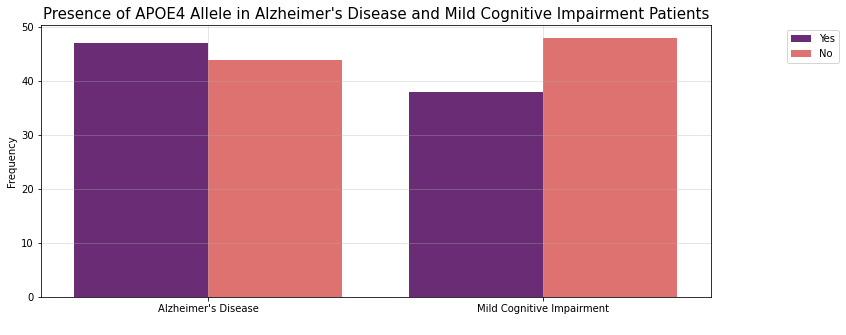

Observed value:


APOE4,No,Yes
Diagnostic,,
Alzheimer's Disease,44,47
Mild Cognitive Impairment,48,38


Expected frequency:


APOE4,No,Yes
Diagnostic,,
Alzheimer's Disease,47.299435,43.700565
Mild Cognitive Impairment,44.700565,41.299435


Test statistic:  0.7101
Test p-value:  0.3994


In [24]:
from scipy.stats import chi2_contingency

# visualization (countplot)
plt.figure(figsize=(12,5))
ax=sns.countplot(data=fil_data, x=fil_data['Diagnostic'], hue=fil_data['APOE4'], palette='magma')
ax.legend(loc='upper right', bbox_to_anchor=(1.2,1))
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.title('Presence of APOE4 Allele in Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.show()

# observed value
contingency_table = pd.crosstab(fil_data['Diagnostic'], fil_data['APOE4'])
print('Observed value:')
display(contingency_table)

# chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency:')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

##### Interpretation of Statistical Test Result:


The investigation into the potential utility of APOE4 as a biomarker for distinguishing between Alzheimer's Disease and Mild Cognitive Impairment involved a chi-square test of association. The observed frequencies revealed that among individuals diagnosed with Alzheimer's Disease, 44 did not possess the APOE4 allele, while 47 did. In the Mild Cognitive Impairment group, 48 individuals did not have the APOE4 allele, and 38 did. The expected frequencies, calculated based on the chi-square test, anticipated values of 47.30 and 43.70 for individuals with Alzheimer's Disease without and with APOE4, respectively. For the Mild Cognitive Impairment group, expected values were 44.70 and 41.30 for individuals without and with APOE4, respectively. The chi-square test statistic of 0.7101 yielded a p-value of 0.3994. As this p-value is greater than the chosen significance level (alpha = 0.05), the null hypothesis of no significant association between the presence of APOE4 and the diagnostic groups (Alzheimer's Disease and Mild Cognitive Impairment) is not rejected.

In summary, the analysis does not provide sufficient evidence to suggest a significant association between the presence of the APOE4 allele and the diagnostic groups of Alzheimer's Disease and Mild Cognitive Impairment. Therefore, based on the chi-square test results, APOE4 alone may not be a robust biomarker for differentiating between these two diagnostic categories in the given dataset. Further investigation and consideration of additional factors may be warranted.

### Variable 7: Gender of the Patients
#### Question | Is there a significant association between the gender of individuals and the diagnostic groups of Alzheimer's Disease and Mild Cognitive Impairment?

- Null Hypothesis (H0): There is no significant association between gender and the diagnostic groups; the distribution of gender is the same for individuals with Alzheimer's Disease and those with Mild Cognitive Impairment.
- Alternative Hypothesis (H1): There is a significant association between gender and the diagnostic groups; the distribution of gender is different for individuals with Alzheimer's Disease compared to those with Mild Cognitive Impairment.

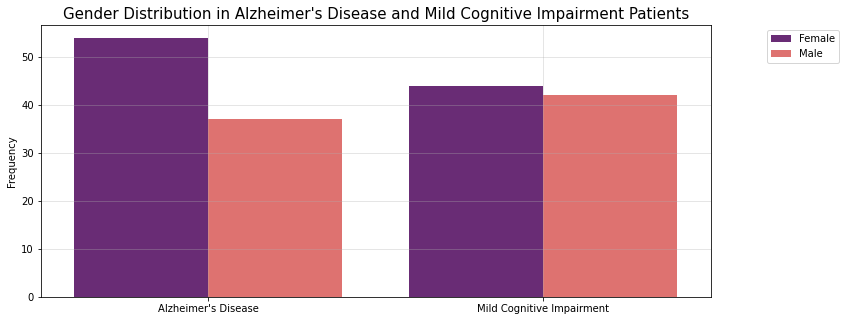

Observed value:


Sex,Female,Male
Diagnostic,,
Alzheimer's Disease,54,37
Mild Cognitive Impairment,44,42


Expected frequency:


Sex,Female,Male
Diagnostic,,
Alzheimer's Disease,50.384181,40.615819
Mild Cognitive Impairment,47.615819,38.384181


Test statistic:  0.8885
Test p-value:  0.3459


In [25]:
# visualization (countplot)
plt.figure(figsize=(12,5))
ax=sns.countplot(data=fil_data, x=fil_data['Diagnostic'], hue=fil_data['Sex'], palette='magma')
ax.legend(loc='upper right', bbox_to_anchor=(1.2,1))
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.title('Gender Distribution in Alzheimer\'s Disease and Mild Cognitive Impairment Patients', fontsize=15)
plt.show()

# observed value
contingency_table = pd.crosstab(fil_data['Diagnostic'], fil_data['Sex'])
print('Observed value:')
display(contingency_table)

# chi-square test
res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_frequency = res[3]

# display the expected frequency
print('Expected frequency:')
display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

##### Interpretation of Statistical Test Result:

The Chi-square test was employed to investigate the association between gender and diagnostic groups( Alzheimer's Disease and Mild Cognitive Impairment). The observed frequencies indicated that for individuals with Alzheimer's Disease, there were 54 females and 37 males, while for Mild Cognitive Impairment, there were 44 females and 42 males. The expected frequencies, considering an equal distribution, were calculated as 50.38 females and 40.62 males for Alzheimer's Disease, and 47.62 females and 38.38 males for Mild Cognitive Impairment. The Chi-square test statistic was computed as 0.8885 with a corresponding p-value of 0.3459. Since the p-value is greater than the threshold (alpha = 0.05), we fail to reject the null hypothesis. Therefore, based on this analysis, there is no significant association between gender and the diagnostic groups of Alzheimer's Disease and Mild Cognitive Impairment. The observed distribution of gender does not differ significantly from what would be expected by chance alone.

#### Correlation between Features Statistically Significant Associated to the Diagnostic

Upon analysis, 5 out of the 7 features in the dataset demonstrated statistically significant associations with the diagnostic labels. These significant features include 'Age,' 'MMSE,' 'CSF Amyloid (pg/mL),' 'CSF Total Tau (pg/mL),' and 'CSF Phosphorylated Tau (pg/mL).' Before proceeding with the training of a classification model to distinguish between Alzheimer's disease and mild cognitive impairment, Pearson's correlation coefficients among these features are computed to elucidate the relationships between them.

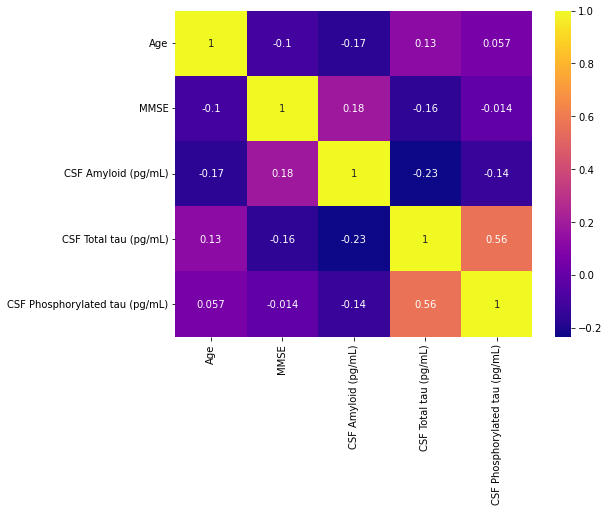

In [26]:
sig_feats = ['Age', 'MMSE', 'CSF Amyloid (pg/mL)','CSF Total tau (pg/mL)', 'CSF Phosphorylated tau (pg/mL)']

# compute the Pearson's correlation between features found to be significantly associated to the diagnostic
correlation = fil_data[sig_feats].corr()

# visualize the correlation in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

### Predicitive Analytics
#### Data Preprocessing for Classification Modelling

In [27]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(fil_data[sig_feats], fil_data['Diagnostic'], test_size=0.2, random_state=122)

In [28]:
from sklearn.preprocessing import LabelEncoder

# encode the target vector of train and test data
encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# scale the train and test dataset
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### Classification
#### Model 1 | Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_scaled, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  0.7224137931034484


#### Model 2 | Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_scaled, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy:  0.7795566502463054


#### Model 3 | Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_scaled, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy:  0.8009852216748767


#### Model 4 | KNearestNeighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]                       # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_scaled,ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best Accuracy: ', grid_search_knn.best_score_)

# get the best model
best_knn = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': 15, 'p': 1}
Best Accuracy:  0.7793103448275862


#### Model 5 | Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC

# create the SVM classifier
svc = SVC(random_state=122)

# define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Choice of kernel
    'gamma': ['scale', 'auto', 0.1, 1],     # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                     # Degree of the polynomial kernel
}

# create a GridSearchCV object with SVM and the parameter grid
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# fit the model with the training data
grid_search_svc.fit(Xtrain_scaled,ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_svc.best_params_)
print('Best Accuracy: ', grid_search_svc.best_score_)

# get the best model
best_svc = grid_search_svc.best_estimator_

Best Parameters:  {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Accuracy:  0.808128078817734


#### Model 6 | Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB 

# create a Naive Bayes classifier
clf = MultinomialNB()

# fit the classifier with training data
mNB = clf.fit(Xtrain_scaled,ytrain_encoded)

### Performance Evaluation and Model Comparison

In [36]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    mcc = matthews_corrcoef(y, ypred)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score','MCC']
    metricValue = [accuracy,precision,recall,fscore,mcc]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [37]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest_scaled,ytest_encoded,best_tree,'Decision Tree')
logistic_summary = performance_evaluation(Xtest_scaled,ytest_encoded,best_logreg,'Logistic Regression')
forest_summary = performance_evaluation(Xtest_scaled,ytest_encoded,best_forest,'Random Forest')
naivebayes_summary = performance_evaluation(Xtest_scaled,ytest_encoded,mNB,'Naive Bayes')
knn_summary = performance_evaluation(Xtest_scaled,ytest_encoded,best_knn,'K Nearest Neigbors')
svc_summary = performance_evaluation(Xtest_scaled,ytest_encoded,best_svc,'Support Vector Machine')

# combine the summary of each model into a dataframe 
comparison_df = pd.concat([tree_summary,forest_summary,logistic_summary,naivebayes_summary,knn_summary,svc_summary], axis=1)

# disply the summary dafaframe
display(comparison_df)

,Decision Tree,Random Forest,Logistic Regression,Naive Bayes,K Nearest Neigbors,Support Vector Machine
Accuracy,0.750000,0.722222,0.722222,0.750000,0.694444,0.694444
Precision,0.750774,0.725000,0.725000,0.794545,0.710702,0.700000
Recall,0.750000,0.722222,0.722222,0.750000,0.694444,0.694444
F1_Score,0.749807,0.721362,0.721362,0.740176,0.688434,0.692308
MCC,0.500773,0.447214,0.447214,0.542720,0.404820,0.394405


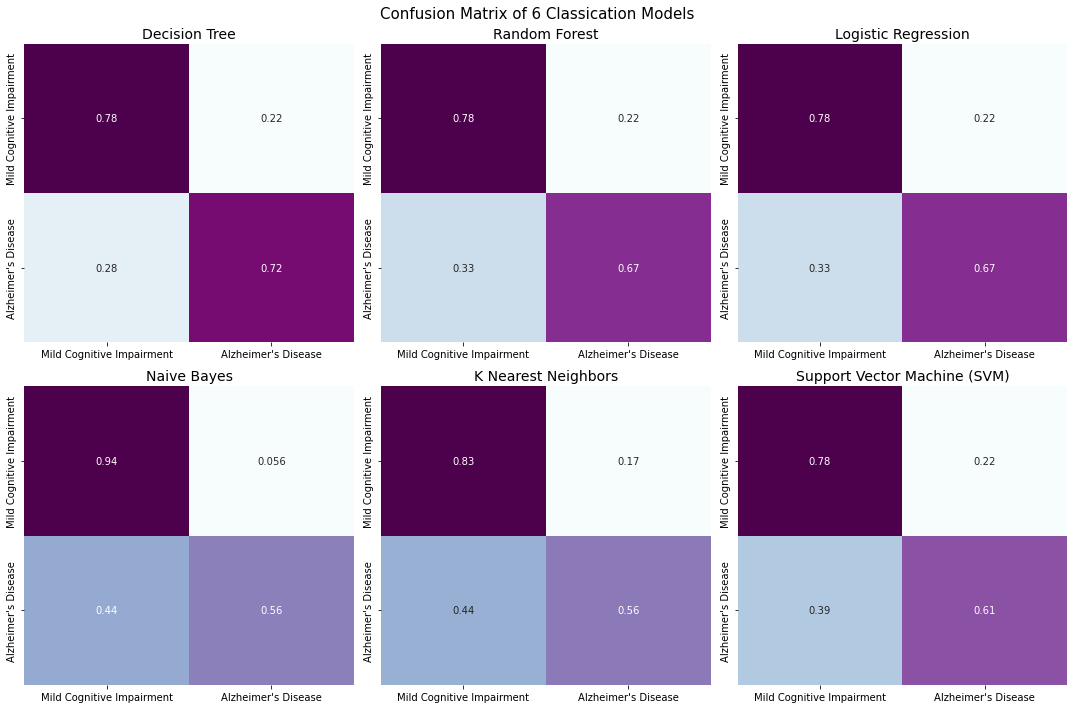

In [38]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

labels = ytrain.unique()

ypred_tree = best_tree.predict(Xtest_scaled)
cm_tree = confusion_matrix(ytest_encoded, ypred_tree, normalize='true')

ypred_forest = best_forest.predict(Xtest_scaled)
cm_forest = confusion_matrix(ytest_encoded, ypred_forest, normalize='true')

ypred_logistic = best_logreg.predict(Xtest_scaled)
cm_logistic = confusion_matrix(ytest_encoded, ypred_logistic, normalize='true')

ypred_nb = mNB.predict(Xtest_scaled)
cm_nb = confusion_matrix(ytest_encoded, ypred_nb, normalize='true')

ypred_knn = best_knn.predict(Xtest_scaled)
cm_knn = confusion_matrix(ytest_encoded, ypred_knn, normalize='true')

ypred_svc = best_svc.predict(Xtest_scaled)
cm_svc = confusion_matrix(ytest_encoded, ypred_svc, normalize='true')


# confusion matrix for 6 classification models
figure, axes = plt.subplots(2,3, figsize=(15,10))
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,0])
axes[0,0].set_title('Decision Tree', fontsize=14)
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,1])
axes[0,1].set_title('Random Forest', fontsize=14)
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,2])
axes[0,2].set_title('Logistic Regression', fontsize=14)
sns.heatmap(cm_nb, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,0])
axes[1,0].set_title('Naive Bayes', fontsize=14)
sns.heatmap(cm_knn, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,1])
axes[1,1].set_title('K Nearest Neighbors', fontsize=14)
sns.heatmap(cm_svc, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,2])
axes[1,2].set_title('Support Vector Machine (SVM)', fontsize=14)

figure.suptitle('Confusion Matrix of 6 Classication Models', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

#### Summary from Predictive Analysis

In the subsequent phase of the analysis, five features identified through the statistical analysis — 'Age,' 'MMSE,' 'CSF Amyloid (pg/mL),' 'CSF Total Tau (pg/mL),' and 'CSF Phosphorylated Tau (pg/mL)' — were employed to train classification models utilizing diverse algorithms. These algorithms encompassed decision tree, logistic regression, random forest, k-nearest neighbors, support vector machine, and naive Bayes. The performance of each model was rigorously evaluated using key metrics such as accuracy, precision, recall, F1 score, and Matthews correlation coefficient (MCC). Notably, the Naive Bayes model demonstrated exceptional accuracy and precision, outshining other algorithms. However, a closer examination of the confusion matrix for each classification model reveals that the decision tree, with a commendable accuracy of 72% for Alzheimer's disease and 78% for Mild Cognitive Impairment, excels in accurately classifying both diagnostic categories among all the trained models.